In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN

In [2]:
import matplotlib.pyplot as plt
# %matplotlib notebook

In [3]:
from sklearn.manifold import TSNE

In [4]:
from sklearn.decomposition import PCA, KernelPCA

In [5]:
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score, normalized_mutual_info_score

In [6]:
import umap.umap_ as umap

Loading data

In [7]:
df = pd.read_csv('msdata.csv')

In [8]:
df.shape

(694, 5002)

Data cleaning: eliminating errors, missing values, duplicates, noise, outliers

Dataset contains no missing values

In [9]:
df.isnull().sum().sum()

0

Detecting extreme values

In [10]:
df.iloc[:,2:].max().max()

26.3404

In [11]:
df.iloc[:,2:].min().min()

0.0

Checking for duplicate rows 

In [12]:
duplicateRowsDF = df[df.duplicated()]

In [13]:
duplicateRowsDF

,id,class,f1,f2,f3,f4,f5,f6,f7,f8,...,f4991,f4992,f4993,f4994,f4995,f4996,f4997,f4998,f4999,f5000


There are still might be noise and errors

Visualization of data

We use TSNE dimensionality reduction to visualize data

In [14]:
X = df.iloc[:,2:].to_numpy()
y = df['class'].to_numpy()

In [57]:
X_tsne_2d = TSNE(n_components=3).fit_transform(X)

In [59]:
def plot_data_2d(X_2d, y, xlabel, ylabel, title):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

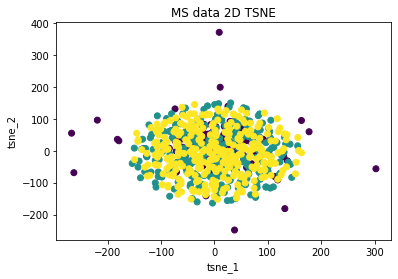

In [58]:
plot_data_2d(X_tsne_2d, y, 'tsne_1', 'tsne_2', 'MS data 2D TSNE')

In [18]:
reducer = umap.UMAP()
X_umap_2d = reducer.fit_transform(X)

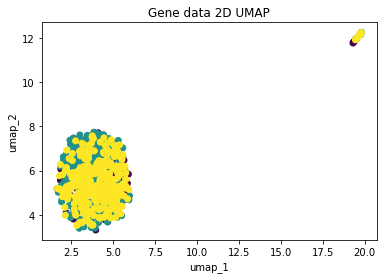

In [19]:
plot_data_2d(X_umap_2d, y,'umap_1', 'umap_2', 'Gene data 2D UMAP')

Baseline kmeans

1. Cluster data using kmeans
2. Measure quality using NMI

Before baseline let's get optimal number of clusters

Elbow Method

In [20]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

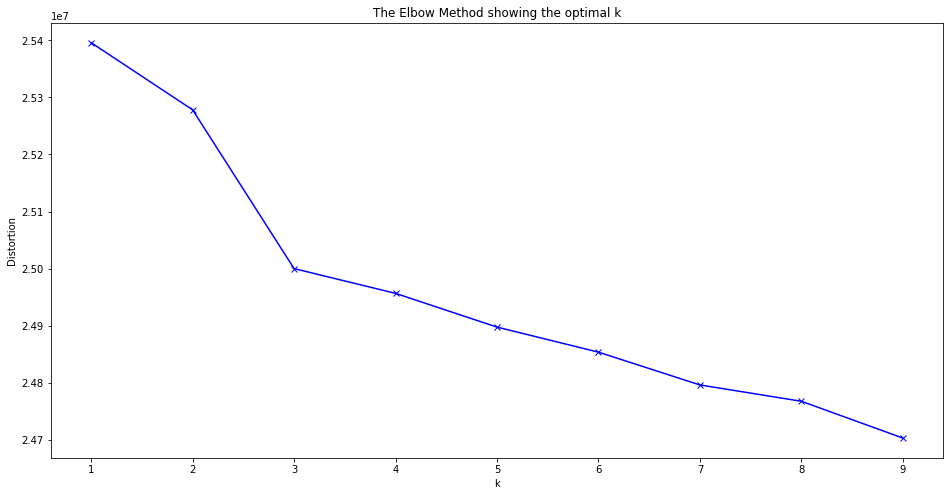

In [21]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
def nmi(y, labels):
    nmi_ = normalized_mutual_info_score(y, labels, average_method='geometric')
    return nmi_
# def nmi(y, labels):
#     # display(y)
#     # display(labels)
#     a = np.column_stack((labels, y))
#     df_mut = pd.DataFrame(a, columns=['C', 'D'])
#     display(df_mut)
#     df_mut['P(C)']=df_mut['C'].map(df_mut['C'].value_counts(normalize=True))
#     df_mut['P(D)']=df_mut['D'].map(df_mut['D'].value_counts(normalize=True))
#     display(df_mut)
#     joint_prob = df_mut.groupby(['C','D'], as_index=False).size()/df_mut.shape[0]
#     print(joint_prob)
#     df_mut = df_mut.set_index(['C','D']).join(joint_prob)
#     df_mut.rename(columns={0:'P(C,D)'}, inplace=True)
#     df_mut = df_mut.drop_duplicates()
#     nom = np.sum(df_mut['P(C,D)']*np.log2(df_mut['P(C,D)']/(df_mut['P(C)']*df_mut['P(D)'])))
#     df_mut['H(C)'] = df_mut['P(C)'] * np.log2(df_mut['P(C)'])
#     df_mut['H(D)'] = df_mut['P(D)'] * np.log2(df_mut['P(D)'])
#     denom = np.sqrt(df_mut['H(C)'].sum()*df_mut['H(D)'].sum())
#     nmi = nom/denom
#     return nmi

In [23]:
ks = range(2,10)

In [24]:

silh_sklearn = []
ch_sklearn = []
db_sklearn = []
nmi_sklearn = []
nmi_custom = []

silh_sklearn_spectral = []
ch_sklearn_spectral = []
db_sklearn_spectral = []
nmi_sklearn_spectral = []
nmi_custom_spectral = []

silh_sklearn_agglo = []
ch_sklearn_agglo = []
db_sklearn_agglo = []
nmi_sklearn_agglo = []
nmi_custom_agglo = []

silh_sklearn_db = []
ch_sklearn_db = []
db_sklearn_db = []
nmi_sklearn_db = []
nmi_custom_db = []

for k in ks:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(X)
    silh_sklearn.append(silhouette_score(X, labels))
    ch_sklearn.append(calinski_harabasz_score(X, labels))
    db_sklearn.append(davies_bouldin_score(X, labels))
    nmi_sklearn.append(adjusted_mutual_info_score(y, labels))
    nmi_custom.append(nmi(y, labels))

for k in ks:
    # model = KMeans(n_clusters=k)
    model = SpectralClustering(n_clusters=k)
    labels = model.fit_predict(X)
    silh_sklearn_spectral.append(silhouette_score(X, labels))
    ch_sklearn_spectral.append(calinski_harabasz_score(X, labels))
    db_sklearn_spectral.append(davies_bouldin_score(X, labels))
    nmi_sklearn_spectral.append(adjusted_mutual_info_score(y, labels))
    nmi_custom_spectral.append(nmi(y, labels))

for k in ks:
    # model = KMeans(n_clusters=k)
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X)
    silh_sklearn_agglo.append(silhouette_score(X, labels))
    ch_sklearn_agglo.append(calinski_harabasz_score(X, labels))
    db_sklearn_agglo.append(davies_bouldin_score(X, labels))
    nmi_sklearn_agglo.append(adjusted_mutual_info_score(y, labels))
    nmi_custom_agglo.append(nmi(y, labels))

for k in ks:
    # model = KMeans(n_clusters=k)
    model = DBSCAN(n_clusters=k)
    labels = model.fit_predict(X)
    silh_sklearn_db.append(silhouette_score(X, labels))
    ch_sklearn_db.append(calinski_harabasz_score(X, labels))
    db_sklearn_db.append(davies_bouldin_score(X, labels))
    nmi_sklearn_db.append(adjusted_mutual_info_score(y, labels))
    nmi_custom_db.append(nmi(y, labels))

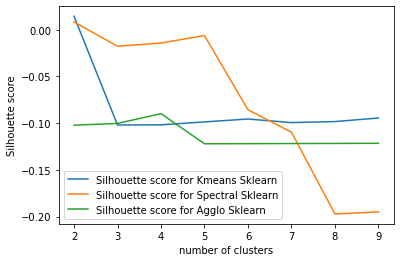

In [25]:
plt.plot(ks, silh_sklearn, label='Silhouette score for Kmeans Sklearn')
plt.plot(ks, silh_sklearn_spectral, label='Silhouette score for Spectral Sklearn')
plt.plot(ks, silh_sklearn_agglo, label='Silhouette score for Agglo Sklearn')
plt.plot(ks, silh_sklearn_db, label='Silhouette score for dbscan Sklearn')
plt.xlabel('number of clusters')
plt.ylabel('Silhouette score')



plt.legend()

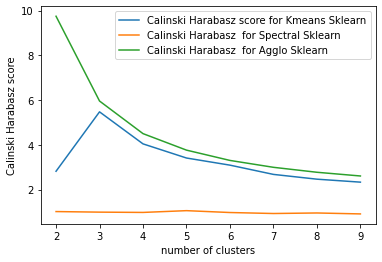

In [26]:
plt.plot(ks, ch_sklearn , label='Calinski Harabasz score for Kmeans Sklearn')
plt.plot(ks, ch_sklearn_spectral, label='Calinski Harabasz  for Spectral Sklearn')
plt.plot(ks, ch_sklearn_agglo, label='Calinski Harabasz  for Agglo Sklearn')
plt.plot(ks, ch_sklearn_db, label='Calinski Harabasz  for dbscan Sklearn')
plt.xlabel('number of clusters')
plt.ylabel('Calinski Harabasz score')

plt.legend()

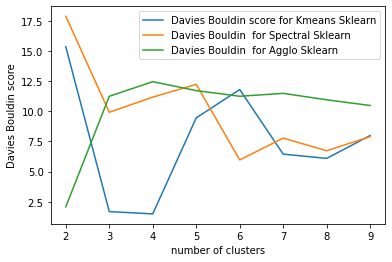

In [27]:
plt.plot(ks, db_sklearn , label='Davies Bouldin score for Kmeans Sklearn')
plt.plot(ks, db_sklearn_spectral, label='Davies Bouldin  for Spectral Sklearn')
plt.plot(ks, db_sklearn_agglo, label='Davies Bouldin  for Agglo Sklearn')
plt.plot(ks, db_sklearn_db, label='Davies Bouldin  for dbscan Sklearn')

plt.xlabel('number of clusters')
plt.ylabel('Davies Bouldin score')

plt.legend()

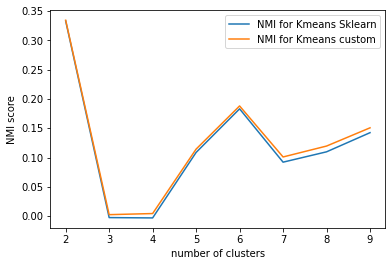

In [28]:
plt.plot(ks, nmi_sklearn , label='NMI for Kmeans Sklearn')
plt.plot(ks, nmi_sklearn_agglo, label='NMI for agglo Sklearn')
plt.plot(ks, nmi_sklearn_spectral, label='NMI for spectral Sklearn')
plt.plot(ks, nmi_sklearn_db, label='NMI for db Sklearn')

plt.xlabel('number of clusters')
plt.ylabel('NMI score')

plt.legend()

In [29]:
kmeans_baseline = KMeans(6)

labels = kmeans_baseline.fit_predict(X)

In [30]:
def draw_class_cluster_subplots(X_2d, classes, clusters, xlabel, ylabel, title_1, title_2):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
    ax1.scatter(X_2d[:, 0], X_2d[:, 1], c=classes)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_title(title_1)
    ax2.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters)
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel)
    ax2.set_title(title_2)

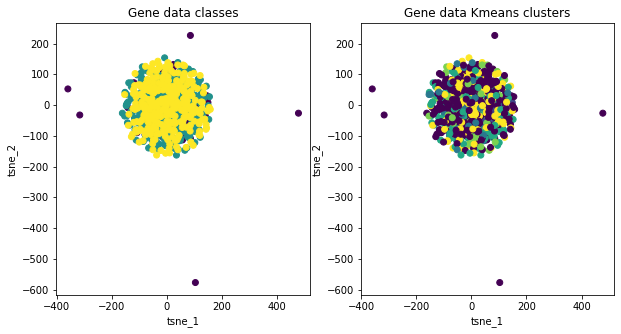

In [31]:
draw_class_cluster_subplots(X_tsne_2d, y, labels, xlabel='tsne_1', ylabel='tsne_2', title_1='Gene data classes', title_2='Gene data Kmeans clusters')

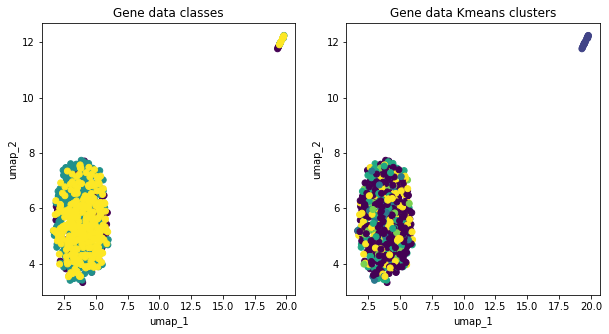

In [32]:
draw_class_cluster_subplots(X_umap_2d, y, labels, xlabel='umap_1', ylabel='umap_2', title_1='Gene data classes', title_2='Gene data Kmeans clusters')

Calculate NMI

In [33]:
normalized_mutual_info_score(y, labels)

0.15945990077502614

In [34]:
adjusted_mutual_info_score(y, labels, average_method="geometric")

0.15607302623897917

Scaling and normalization

    - min-max scaling $y=\frac{x - min(x)}{max(x) - min(x)}$
    - mean-normalization $y=\frac{x - mean(x)}{max(x)-min(x)}$
    - standardization $y=\frac{x-mean(x)}{stdev(x)}$ 

In [35]:
X_min_max = (X - X.min())/(X.max()-X.min())

In [36]:
labels_min_max = kmeans_baseline.fit_predict(X_min_max)

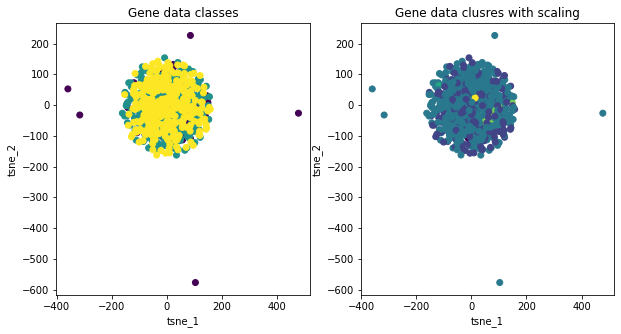

In [37]:
draw_class_cluster_subplots(X_tsne_2d, y, labels_min_max, 'tsne_1', 'tsne_2', 'Gene data classes', 'Gene data clusres with scaling')

In [38]:
nmi(y, labels_min_max)

0.06603406666955991

In [39]:
adjusted_mutual_info_score(y, labels_min_max, average_method="geometric")

0.058054433775975606

In [40]:
X.mean(axis=0).shape

(5000,)

In [41]:
X_mean_centr = (X - X.mean(axis=0))/(X.max()-X.min())

In [42]:
labels_mean = kmeans_baseline.fit_predict(X_mean_centr)

In [43]:
nmi(y, labels_mean)

0.13714902019894307

In [44]:
adjusted_mutual_info_score(y, labels_mean, average_method="geometric")

0.13140137436306185

In [45]:
X_standard = (X-X.mean(axis=0))/X.std(axis=0)

In [46]:
labels_standard = kmeans_baseline.fit_predict(X_standard)

In [47]:
nmi(y, labels_standard)

0.04605201447951544

In [48]:
adjusted_mutual_info_score(y, labels_standard, average_method="geometric")

0.03730433790888993

Data contains 7000 features, which is too high to be clustered efficiently

There are approaches which might help us to overcome this problem:
0. Feature engineering
1. Feature selection techniques:
    - Pearson correlation -> get most correlated features 
    - Type transport similarity graph
    - Weighted graph to multidimensional
    - Dim reduction: PCA, TSNE, UMAP

In [49]:
# corr = pd.read_csv('gene_data_correlations.csv')

In [50]:
sorted_corr = abs(corr.loc[1:, 'class']).sort_values(ascending=False)

NameError: name 'corr' is not defined

In [73]:
X_high_corr = X[:,sorted_corr[sorted_corr>0.1].index]

NameError: name 'sorted_corr' is not defined

In [ ]:
labels_highcorr = kmeans_baseline.fit_predict(X_high_corr)

In [ ]:
nmi(y, labels_highcorr)

In [ ]:
adjusted_mutual_info_score(y, labels_highcorr, average_method="geometric")

Dimensionality reduction

PCA

Text(0, 0.5, 'cumulative explained variance')

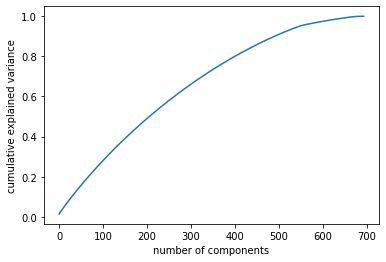

In [138]:
# Attempted dimensionality reduction with different kernels, no luck.
kpca = KernelPCA(kernel='poly').fit_transform(X)
explained_variance = np.var(kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [144]:
pca = PCA(n_components=50)

In [140]:
X_red_pca_500 = pca.fit_transform(X)
kmeans = KMeans(6)
labels_pca = kmeans.fit_predict(X_red_pca_500)


In [145]:
nmi(y, labels_pca)


0.01237421876162056

In [300]:
adjusted_mutual_info_score(y, labels_pca, average_method="geometric")

0.5859943382687406

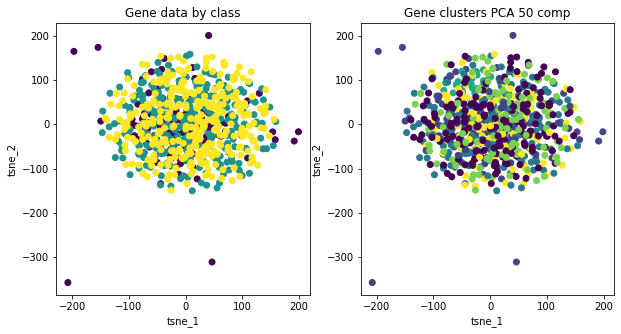

In [301]:
draw_class_cluster_subplots(X_tsne_2d, y, labels_pca, 'tsne_1', 'tsne_2', 'Gene data by class', 'Gene clusters PCA 50 comp' )

UMAP

In [ ]:
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

reducer = umap.UMAP() 
X_red_umap = reducer.fit_transform(X)
kmeans = KMeans(n_clusters=3)
labels_umap = kmeans.fit_predict(X_red_umap)

# sns.pairplot(df, hue='species_short')

In [445]:
nmi(y, labels_umap)

0.010574261445465204

In [446]:
adjusted_mutual_info_score(y, labels_umap, average_method="geometric")

0.007460948634790978

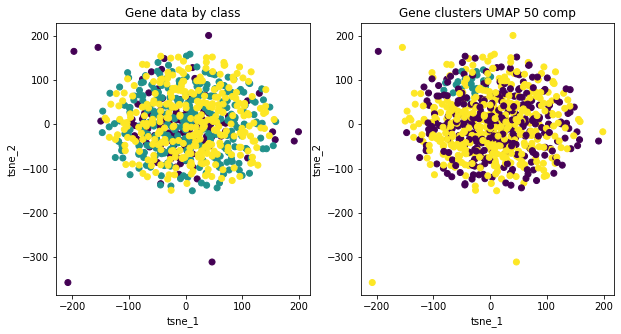

In [447]:
draw_class_cluster_subplots(X_tsne_2d, y, labels_umap, 'tsne_1', 'tsne_2', 'Gene data by class', 'Gene clusters UMAP 50 comp' )

Distances to overcome curse of dimensionality
    - LP with small p
    - Cosine similarity
    - match based similarity
    
Mahalanobis distance to take distribution into account
Isomap 

KMeans Cosine similarity

In [448]:
length = np.sqrt((X**2).sum(axis=1))[:,None]
X_unit = X / length

In [449]:
kmeans = KMeans(n_clusters=3)
labels_cos = kmeans.fit_predict(X_unit)

In [450]:
nmi(y, labels_cos)

0.13867078617024473

In [451]:
adjusted_mutual_info_score(y, labels_cos)

0.13598378648995108

Kmeans fractional LP

In [452]:
def distance_pair(arr, oth_arr, type='euclidean', p=2):
    k = oth_arr.shape[0]
    n = arr.shape[0]
    diff_matrix = np.zeros((k, n))
    if type=='euclidean':
        for i in range(k):
            diff = (arr - oth_arr[i])
            diff_prod = diff.dot(diff.T)
            diff_matrix[i] = np.sqrt(diff_prod[np.diag_indices(n)])
    if type=='manhattan':
        for i in range(k):
            diff = abs(arr - oth_arr[i])
            diff_matrix[i] = np.sum(diff, axis=1)
    if type=='lp':
        for i in range(k):
            diff = (arr - oth_arr[i])
            diff = diff**p
            diff_prod = diff.sum()
            diff_prod = diff.dot(diff.T)
            diff_matrix[i] = np.sqrt(diff_prod[np.diag_indices(n)])
            
    return diff_matrix.T

In [453]:
def kmeans(X, k, random_state=123):
    np.random.seed(random_state)
    n = X.shape[0]
    centroids = X[np.random.randint(0, n, k), :]
    num_iter = 300
    labels = np.argmin(distance_pair(X, centroids), axis=1)
    for iter in range(num_iter):
        for i in range(k):
            centroids[i] = X[np.where(labels==i)[0],:].mean(axis=0)
        new_labels = np.argmin(distance_pair(X, centroids), axis=1)
        if np.array_equal(labels, new_labels):
            return labels
        labels = new_labels
    return labels

In [454]:
n = X.shape[0]

In [455]:
centroids = X[np.random.randint(0, n, k), :]

In [456]:
diff = X - centroids[0]

In [457]:
(diff**(1/7)).sum(axis=1)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

Study clustering tendency and choose features
    - Plotting distance distributions
    - Entropy
    - Hopkins statistic
    - Wrapper models + validation indices

1. Plotting distance distributions 

In [458]:
from scipy.spatial.distance import pdist

In [459]:
pairwise_dist = pdist(X_min_max)

In [460]:
pairwise_dist.shape

(240471,)

Text(0, 0.5, 'frequency')

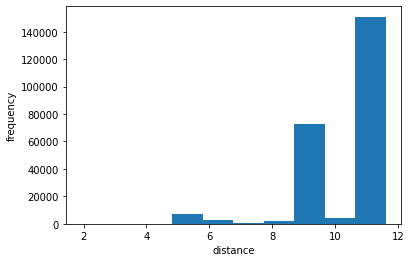

In [461]:
plt.hist(pairwise_dist)
plt.xlabel('distance')
plt.ylabel('frequency')

Study entropy

In [462]:
pd.cut(pairwise_dist, 5)

[(3.859, 5.794], (1.915, 3.859], (1.915, 3.859], (1.915, 3.859], (5.794, 7.728], ..., (9.663, 11.597], (9.663, 11.597], (9.663, 11.597], (9.663, 11.597], (9.663, 11.597]]
Length: 240471
Categories (5, interval[float64]): [(1.915, 3.859] < (3.859, 5.794] < (5.794, 7.728] < (7.728, 9.663] < (9.663, 11.597]]

In [463]:
df_dist = pd.DataFrame(pairwise_dist)

df_dist_prob = df_dist.groupby([pd.cut(df_dist[0], 5)]).count()/df_dist.shape[0]

df_dist_prob.rename(columns={0:'p'}, inplace=True)

df_dist_prob['1-p'] = 1 - df_dist_prob['p']

entropy = (-1)*(df_dist_prob['p']*np.log2(df_dist_prob['p']) + df_dist_prob['1-p']*np.log2(df_dist_prob['1-p'])).sum()

In [464]:
entropy

2.132860201612986

In [465]:
pairwise_dist_cos = pdist(X_min_max, metric='cosine')

Text(0, 0.5, 'frequency')

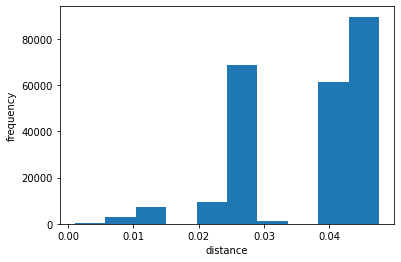

In [466]:
plt.hist(pairwise_dist_cos)
plt.xlabel('distance')
plt.ylabel('frequency')

In [467]:
df_dist = pd.DataFrame(pairwise_dist_cos)

df_dist_prob = df_dist.groupby([pd.cut(df_dist[0], 5)]).count()/df_dist.shape[0]

df_dist_prob.rename(columns={0:'p'}, inplace=True)

df_dist_prob['1-p'] = 1 - df_dist_prob['p']

entropy = (-1)*(df_dist_prob['p']*np.log2(df_dist_prob['p']) + df_dist_prob['1-p']*np.log2(df_dist_prob['1-p'])).sum()

In [468]:
entropy

2.1982569090384683

In [469]:
pairwise_dist_mah = pdist(X_min_max, metric='mahalanobis')

ValueError: The number of observations (694) is too small; the covariance matrix is singular. For observations with 5000 dimensions, at least 5001 observations are required.

Hopkins statistic

In [ ]:
idx = np.random.randint(X.shape[0], size=100)

In [ ]:
X_min_max[idx,:].shape

In [ ]:
random_data = np.random.uniform(size=X.shape)

In [ ]:
idx_random = np.random.randint(X.shape[0], size=100)

In [ ]:
random_data[idx_random, :].shape

In [ ]:
from scipy.spatial import KDTree

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
nn = NearestNeighbors(n_neighbors=1, metric='euclidean', algorithm='brute').fit(X_min_max[idx, :])
dists, idxs = nn.kneighbors(X_min_max[idx, :])

In [ ]:
nn = NearestNeighbors(n_neighbors=1, metric='euclidean', algorithm='brute').fit(random_data[idx_random, :])
dists_rand, idxs_rand = nn.kneighbors(random_data[idx_random, :])

In [ ]:
dists_rand.sum()/((dists+dists_rand).sum())

In [ ]:
nn = NearestNeighbors(n_neighbors=1, metric='cosine', algorithm='brute').fit(X_min_max[idx, :])
dists, idxs = nn.kneighbors(X_min_max[idx, :])

In [ ]:
nn = NearestNeighbors(n_neighbors=1, metric='cosine', algorithm='brute').fit(random_data[idx_random, :])
dists_rand, idxs_rand = nn.kneighbors(random_data[idx_random, :])

In [ ]:
dists_rand.sum()/((dists+dists_rand).sum())

Wrapper models and validation indices

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.1)

In [ ]:
df['class'].value_counts(normalize=True)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
lr = LogisticRegression(multi_class='multinomial')

In [ ]:
scores = []
for i in range(7000):
    print(i)
    lr.fit(X_train[:,i].reshape((-1, 1)), y_train)
    scores.append(f1_score(y_test, test.predict(X_test[:,i].reshape((-1,1))), average='macro'))

In [ ]:
np.max(scores)

In [ ]:
np.min(scores)

In [ ]:
np.argsort(scores)[:10]

In [ ]:
abs(corr['class']).sort_values(ascending=False)[:10]

In [ ]:
scores = np.array(scores)

In [ ]:
scores[scores>0.13].shape

In [ ]:
np.argwhere(scores>0.15).flatten()

In [ ]:
X[:, np.argwhere(scores>0.15).flatten()].shape

In [ ]:
labels_wm = kmeans_baseline.fit_predict(X[:, np.argwhere(scores>0.15).flatten()])

In [ ]:
nmi(y, labels_wm)

In [ ]:
adjusted_mutual_info_score(y, labels_wm)

In [ ]:
from sklearn.metrics import normalized_mutual_info_score

In [ ]:
normalized_mutual_info_score(y, labels_wm, average_method='geometric')

In [ ]:
normalized_mutual_info_score(y, labels_wm)

DBSCAN

In [64]:
from sklearn import metrics

In [62]:
db = DBSCAN(eps=4, min_samples=10).fit(X_min_max)

In [65]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_min_max, labels))

Estimated number of clusters: 1
Estimated number of noise points: 671
Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand Index: -0.000
Adjusted Mutual Information: -0.003
Silhouette Coefficient: -0.103


In [66]:
pairwise_dist

NameError: name 'pairwise_dist' is not defined